In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

In [2]:
df = pd.read_csv('D:\\Data Science\\Code basics\\py-master\\ML\\FeatureEngineering\\3_outlier_IQR\\Exercise\\height_weight.csv')

In [3]:
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


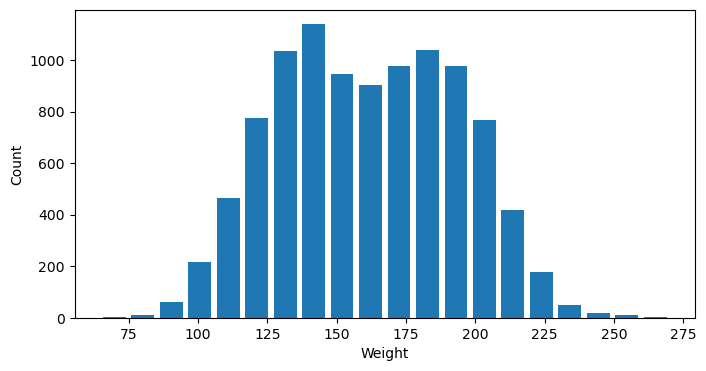

In [6]:
plt.hist(df.weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

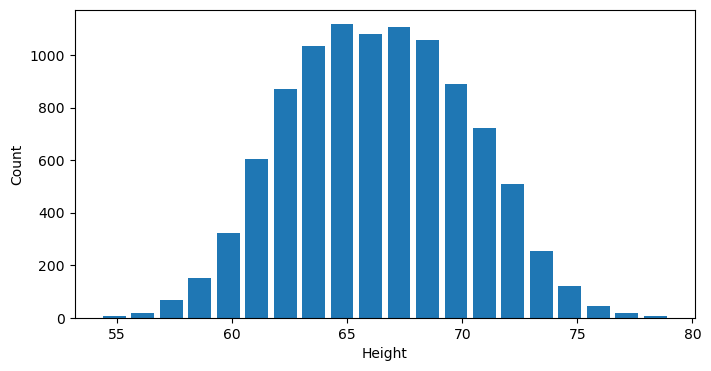

In [7]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

In [8]:
## Detect outliers using IQR

H_Q1 = df.height.quantile(0.25)
H_Q3 = df.height.quantile(0.75)

H_IQR = H_Q3-H_Q1
H_IQR

5.668641245615746

In [9]:
W_Q1 = df.weight.quantile(0.25)
W_Q3 = df.weight.quantile(0.75)

W_IQR = W_Q3-W_Q1
W_IQR

51.35147356318197

In [10]:
H_lower_limit = H_Q1 - 1.5*H_IQR
H_upper_limit = H_Q3 + 1.5*H_IQR
H_lower_limit, H_upper_limit

(55.00265861279534, 77.67722359525831)

In [11]:
W_lower_limit = W_Q1 - 1.5*W_IQR
W_upper_limit = W_Q3 + 1.5*W_IQR
W_lower_limit, W_upper_limit

(58.79084096072856, 264.19673521345646)

In [12]:
df[(df.height<H_lower_limit)|(df.height>H_upper_limit)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [13]:
df[(df.weight<W_lower_limit)|(df.weight>W_upper_limit)]

,gender,height,weight
2014,Male,78.998742,269.989699
